In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
import re
import plotly.graph_objects as go
import plotly.express as px
from collections import defaultdict

In [9]:
# Carregar base de dados extraida da web para df
df = pd.read_csv("emplacamentos_veiculos.csv")

In [10]:
df.head(10)

,Pos.,Veículo,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,Total
0,1º,Chevrolet Onix,150.838,125.034,153.380,188.668,210.466,241.229,135.367,73.633,85.261,102.048,97.505,42.083,1.727.852
1,2º,Hyundai HB20,119.788,109.850,121.603,105.544,105.518,101.597,86.571,86.464,96.199,88.908,97.083,42.394,1.283.901
2,3º,Fiat Strada,153.141,98.241,59.451,54.874,67.233,76.279,80.050,109.112,112.464,120.602,144.693,75.598,1.274.651
3,4º,Volkswagen Gol,183.368,82.372,60.043,73.922,77.624,81.290,71.153,66.234,72.592,6.176,53.000,16.000,1.029.898
4,5º,Toyota Corolla,63.299,66.934,64.744,66.198,59.065,56.712,41.083,41.902,42.852,42.928,37.671,21.581,659.075
5,6º,Ford Ka,43.838,89.749,76.616,94.896,104.450,104.338,67.501,8.465,16.000,10.000,NaN,NaN,616.134
6,7º,Fiat Argo,NaN,NaN,NaN,27.929,63.017,79.006,65.943,84.656,64.022,66.720,91.143,54.435,596.871
7,8º,Volkswagen Saveiro,83.038,56.530,33.954,42.447,45.925,42.272,30.968,26.755,23.419,46.601,56.987,34.843,596.114
8,9º,Renault Sandero,95.385,77.838,63.232,67.352,52.406,50.286,26.347,12.443,10.628,7.860,4.633,174.000,571.104
9,10º,Fiat Palio,184.337,121.522,64.000,20.141,391.000,40.000,4.000,11.000,NaN,NaN,NaN,NaN,567.477


🚗 ANALISADOR DE EMPLACAMENTOS - SÉRIE TEMPORAL
Dataset carregado: 9360 registros
Colunas: ['Pos.', 'Veículo', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', 'Total']
Colunas disponíveis: ['Pos.', 'Veículo', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', 'Total']
Colunas de anos identificadas: ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']
Coluna de nomes identificada: Veículo

📈 ANÁLISE DE TENDÊNCIAS (Top 10):

🚗 Chevrolet Onix:
   Crescimento total: -72.1%
   Pico: 241,229 emplacamentos em 2019
   Último ano: 42,083 emplacamentos

🚗 Hyundai HB20:
   Crescimento total: -64.6%
   Pico: 121,603 emplacamentos em 2016
   Último ano: 42,394 emplacamentos

🚗 Fiat Strada:
   Crescimento total: -50.6%
   Pico: 153,141 emplacamentos em 2014
   Último ano: 75,598 emplacamentos

🚗 Volkswagen Gol:
   Crescimento total: -99.9%
   Pico: 183,368 emplacame

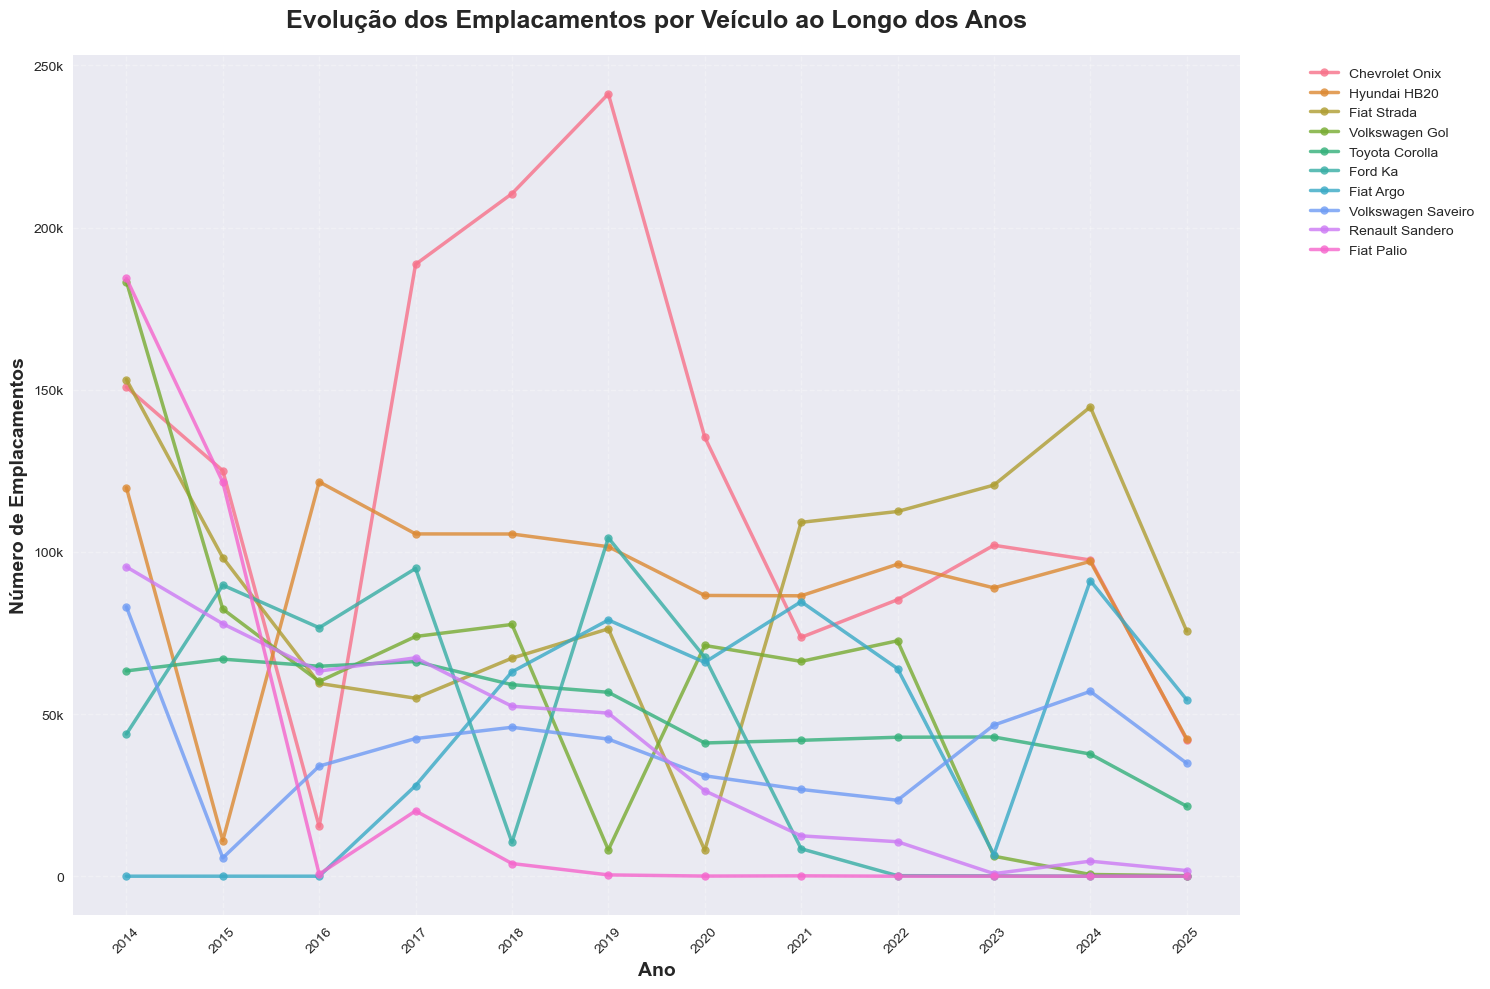


🌐 Criando gráfico interativo...
Colunas disponíveis: ['Pos.', 'Veículo', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', 'Total']
Colunas de anos identificadas: ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']
Coluna de nomes identificada: Veículo
Anos processados: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
Processando 10 veículos...
Processando: Chevrolet Onix
  2014: 150,838
  2015: 125,034
  2016: 15,338
  2017: 188,668
  2018: 210,466
  2019: 241,229
  2020: 135,367
  2021: 73,633
  2022: 85,261
  2023: 102,048
  2024: 97,505
  2025: 42,083
Processando: Hyundai HB20
  2014: 119,788
  2015: 10,985
  2016: 121,603
  2017: 105,544
  2018: 105,518
  2019: 101,597
  2020: 86,571
  2021: 86,464
  2022: 96,199
  2023: 88,908
  2024: 97,083
  2025: 42,394
Processando: Fiat Strada
  2014: 153,141
  2015: 98,241
  2016: 59,451
  2017: 54,874
  2018: 67,233
  2019: 76

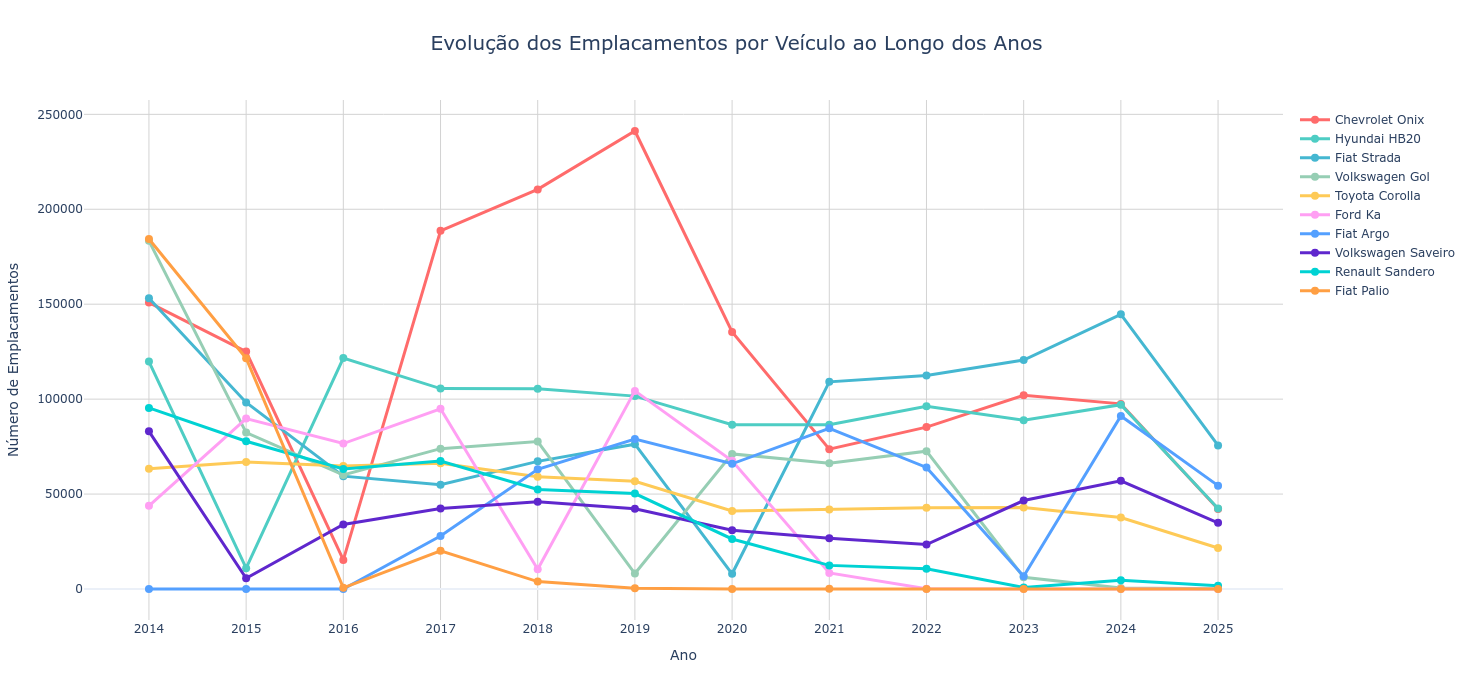

Gráfico interativo criado! Você pode fazer zoom, hover, etc.


In [11]:
# Análise completa do dataframe. Código gerado com claude.ai de acordo com os objetivos determinados.
import warnings
warnings.filterwarnings('ignore')

# Configuração para gráficos mais bonitos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def processar_dados_temporais(df):
    """
    Processa o dataframe para extrair os anos e preparar dados temporais
    """
    # Assume que o dataframe tem colunas com anos (ex: '2020', '2021', etc.)
    # ou uma estrutura similar
    
    print("Colunas disponíveis:", df.columns.tolist())
    
    # Identifica colunas que representam anos
    year_columns = []
    for col in df.columns:
        try:
            # Verifica se a coluna é um ano (número entre 2000 e 2030)
            year = int(str(col).strip())
            if 2000 <= year <= 2030:
                year_columns.append(col)
        except:
            continue
    
    if not year_columns:
        print("Tentando identificar padrões de anos nas colunas...")
        # Procura por padrões como "Ano_2020", "2020_total", etc.
        import re
        for col in df.columns:
            if re.search(r'20[0-9]{2}', str(col)):
                year_match = re.search(r'(20[0-9]{2})', str(col))
                if year_match:
                    year_columns.append(col)
    
    print(f"Colunas de anos identificadas: {year_columns}")
    
    # Identifica a coluna com o nome do veículo
    name_column = None
    possible_name_cols = ['Veículo', 'veiculo', 'Modelo', 'modelo', 'Nome', 'nome', 'Vehicle']
    for col in df.columns:
        if any(name_col.lower() in col.lower() for name_col in possible_name_cols):
            name_column = col
            break
    
    if not name_column and len(df.columns) > 0:
        # Usa a primeira coluna que não é numérica
        for col in df.columns:
            if df[col].dtype == 'object':
                name_column = col
                break
    
    print(f"Coluna de nomes identificada: {name_column}")
    
    return year_columns, name_column

def criar_grafico_serie_temporal(df, top_n=10, figsize=(15, 10)):
    """
    Cria gráfico de série temporal dos emplacamentos
    """
    # Processa os dados
    year_columns, name_column = processar_dados_temporais(df)
    
    if not year_columns or not name_column:
        print("Erro: Não foi possível identificar as colunas de anos ou nomes.")
        return None
    
    # Pega apenas os top N veículos
    df_top = df.head(top_n).copy()
    
    # Prepara dados para o gráfico
    plt.figure(figsize=figsize)
    
    # Converte anos para formato numérico para ordenação
    years = sorted([int(str(col).strip()) if str(col).strip().isdigit() 
                   else int(re.search(r'(20[0-9]{2})', str(col)).group(1)) 
                   for col in year_columns])
    
    colors = sns.color_palette("husl", len(df_top))
    
    # Plota cada veículo
    for idx, (_, row) in enumerate(df_top.iterrows()):
        vehicle_name = row[name_column]
        values = []
        
        for year in years:
            # Procura a coluna correspondente ao ano
            year_col = None
            for col in year_columns:
                if str(year) in str(col):
                    year_col = col
                    break
            
            if year_col is not None:
                try:
                    # Remove caracteres não numéricos e converte
                    value = str(row[year_col]).replace(',', '').replace('.', '').strip()
                    value = int(value) if value.isdigit() else 0
                    values.append(value)
                except:
                    values.append(0)
            else:
                values.append(0)
        
        # Plota a linha para este veículo
        plt.plot(years, values, marker='o', linewidth=2.5, markersize=6,
                label=vehicle_name, color=colors[idx], alpha=0.8)
    
    # Formatação do gráfico
    plt.title('Evolução dos Emplacamentos por Veículo ao Longo dos Anos', 
              fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Ano', fontsize=14, fontweight='bold')
    plt.ylabel('Número de Emplacamentos', fontsize=14, fontweight='bold')
    
    # Formatar eixo Y para mostrar números grandes de forma legível
    def format_thousands(x, pos):
        if x >= 1000000:
            return f'{x/1000000:.1f}M'
        elif x >= 1000:
            return f'{x/1000:.0f}k'
        else:
            return f'{x:.0f}'
    
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))
    
    # Configurar eixo X
    plt.xticks(years, rotation=45)
    
    # Grade para melhor leitura
    plt.grid(True, alpha=0.3, linestyle='--')
    
    # Legenda
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    # Ajustar layout
    plt.tight_layout()
    
    # Mostrar estatísticas
    print(f"\n📊 Estatísticas do gráfico:")
    print(f"Período analisado: {min(years)} - {max(years)}")
    print(f"Número de veículos: {len(df_top)}")
    print(f"Anos disponíveis: {len(years)}")
    
    return plt

def criar_grafico_simples_plotly(df, top_n=10):
    """
    Versão mais simples do Plotly com melhor compatibilidade
    """
    try:
        import plotly.graph_objects as go
        import plotly.offline as pyo
        
        # Processa os dados
        year_columns, name_column = processar_dados_temporais(df)
        
        if not year_columns or not name_column:
            print("Erro: Não foi possível identificar as colunas.")
            return None
        
        # Pega apenas os top N
        df_top = df.head(top_n).copy()
        
        # Prepara dados
        years = sorted([int(str(col)) for col in year_columns if str(col).isdigit()])
        
        print(f"Anos processados: {years}")
        print(f"Processando {len(df_top)} veículos...")
        
        fig = go.Figure()
        
        # Cores mais distintas
        colors = [
            '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57',
            '#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3', '#FF9F43'
        ]
        
        # Adiciona cada veículo
        for idx, (_, row) in enumerate(df_top.iterrows()):
            vehicle_name = str(row[name_column])[:30]  # Limita nome
            values = []
            
            print(f"Processando: {vehicle_name}")
            
            for year in years:
                year_str = str(year)
                if year_str in df.columns:
                    try:
                        # Limpa e converte o valor
                        raw_value = str(row[year_str])
                        # Remove tudo que não é número
                        clean_value = ''.join(c for c in raw_value if c.isdigit())
                        value = int(clean_value) if clean_value else 0
                        values.append(value)
                        print(f"  {year}: {value:,}")
                    except Exception as e:
                        print(f"  {year}: erro - {e}")
                        values.append(0)
                else:
                    values.append(0)
            
            # Só adiciona se tem dados válidos
            if sum(values) > 0:
                fig.add_trace(go.Scatter(
                    x=years,
                    y=values,
                    mode='lines+markers',
                    name=vehicle_name,
                    line=dict(width=3, color=colors[idx % len(colors)]),
                    marker=dict(size=8, color=colors[idx % len(colors)]),
                    hovertemplate=f'<b>{vehicle_name}</b><br>' +
                                 'Ano: %{x}<br>' +
                                 'Emplacamentos: %{y:,}<br>' +
                                 '<extra></extra>'
                ))
        
        fig.update_layout(
            title={
                'text': 'Evolução dos Emplacamentos por Veículo ao Longo dos Anos',
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 20}
            },
            xaxis_title='Ano',
            yaxis_title='Número de Emplacamentos',
            hovermode='x unified',
            template='plotly_white',
            width=1200,
            height=700,
            font=dict(size=12),
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="left",
                x=1.01
            )
        )
        
        fig.update_xaxes(
            showgrid=True, 
            gridwidth=1, 
            gridcolor='lightgray',
            tickmode='linear',
            dtick=1
        )
        fig.update_yaxes(
            showgrid=True, 
            gridwidth=1, 
            gridcolor='lightgray',
            tickformat=',.'
        )
        
        print("Gráfico Plotly criado com sucesso!")
        return fig
    
    except ImportError:
        print("Plotly não está instalado. Use: pip install plotly")
        return None
    except Exception as e:
        print(f"Erro ao criar gráfico Plotly: {e}")
        return None
    """
    Versão alternativa usando Plotly para gráfico interativo
    """
    try:
        import plotly.graph_objects as go
        from plotly.subplots import make_subplots
        import plotly.express as px
        
        # Processa os dados
        year_columns, name_column = processar_dados_temporais(df)
        
        if not year_columns or not name_column:
            print("Erro: Não foi possível identificar as colunas.")
            return None
        
        # Pega apenas os top N
        df_top = df.head(top_n).copy()
        
        # Prepara dados
        years = sorted([int(str(col).strip()) if str(col).strip().isdigit() 
                       else int(re.search(r'(20[0-9]{2})', str(col)).group(1)) 
                       for col in year_columns])
        
        fig = go.Figure()
        
        # Cores
        colors = px.colors.qualitative.Set3[:len(df_top)]
        
        # Adiciona cada veículo
        for idx, (_, row) in enumerate(df_top.iterrows()):
            vehicle_name = row[name_column]
            values = []
            
            for year in years:
                year_col = None
                for col in year_columns:
                    if str(year) in str(col):
                        year_col = col
                        break
                
                if year_col is not None:
                    try:
                        value = str(row[year_col]).replace(',', '').replace('.', '').strip()
                        value = int(value) if value.isdigit() else 0
                        values.append(value)
                    except:
                        values.append(0)
                else:
                    values.append(0)
            
            fig.add_trace(go.Scatter(
                x=years,
                y=values,
                mode='lines+markers',
                name=vehicle_name,
                line=dict(width=3, color=colors[idx % len(colors)]),
                marker=dict(size=8),
                hovertemplate=f'<b>{vehicle_name}</b><br>' +
                             'Ano: %{x}<br>' +
                             'Emplacamentos: %{y:,}<br>' +
                             '<extra></extra>'
            ))
        
        fig.update_layout(
            title='Evolução dos Emplacamentos por Veículo ao Longo dos Anos',
            xaxes_title='Ano',
            yaxes_title='Número de Emplacamentos',
            hovermode='x unified',
            template='plotly_white',
            width=1200,
            height=600,
            font=dict(size=12),
            title_font=dict(size=18, family="Arial Black"),
        )
        
        fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
        fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
        
        return fig
    
    except ImportError:
        print("Plotly não está instalado. Use: pip install plotly")
        return None

def analisar_tendencias(df, top_n=10):
    """
    Análise das tendências dos dados
    """
    year_columns, name_column = processar_dados_temporais(df)
    
    if not year_columns or not name_column:
        return
    
    df_top = df.head(top_n).copy()
    years = sorted([int(str(col).strip()) if str(col).strip().isdigit() 
                   else int(re.search(r'(20[0-9]{2})', str(col)).group(1)) 
                   for col in year_columns])
    
    print(f"\n📈 ANÁLISE DE TENDÊNCIAS (Top {top_n}):")
    print("="*50)
    
    for _, row in df_top.iterrows():
        vehicle_name = row[name_column]
        values = []
        
        for year in years:
            year_col = None
            for col in year_columns:
                if str(year) in str(col):
                    year_col = col
                    break
            
            if year_col is not None:
                try:
                    value = str(row[year_col]).replace(',', '').replace('.', '').strip()
                    value = int(value) if value.isdigit() else 0
                    values.append(value)
                except:
                    values.append(0)
            else:
                values.append(0)
        
        # Calcula tendência
        if len(values) >= 2:
            crescimento = ((values[-1] - values[0]) / values[0] * 100) if values[0] > 0 else 0
            pico = max(values)
            ano_pico = years[values.index(pico)]
            
            print(f"\n🚗 {vehicle_name}:")
            print(f"   Crescimento total: {crescimento:+.1f}%")
            print(f"   Pico: {pico:,} emplacamentos em {ano_pico}")
            print(f"   Último ano: {values[-1]:,} emplacamentos")

# Exemplo de uso principal
def main(df):
    """
    Função principal para criar os gráficos
    """
    print("🚗 ANALISADOR DE EMPLACAMENTOS - SÉRIE TEMPORAL")
    print("="*50)
    
    # Mostra info do dataframe
    print(f"Dataset carregado: {len(df)} registros")
    print(f"Colunas: {df.columns.tolist()}")
    
    # Análise de tendências
    analisar_tendencias(df, top_n=10)
    
    # Gráfico com matplotlib
    print(f"\n📊 Criando gráfico de série temporal...")
    plt_fig = criar_grafico_serie_temporal(df, top_n=10)
    
    if plt_fig:
        plt.show()
    
    # Gráfico interativo (versão melhorada)
    print(f"\n🌐 Criando gráfico interativo...")
    plotly_fig = criar_grafico_simples_plotly(df, top_n=10)
    
    if plotly_fig:
        # Tenta diferentes formas de mostrar o gráfico
        try:
            # Método 1: Show padrão (funciona no Jupyter)
            plotly_fig.show()
            print("Gráfico interativo criado! Você pode fazer zoom, hover, etc.")
        except:
            try:
                # Método 2: Salvar como HTML e abrir
                import webbrowser
                import tempfile
                import os
                
                # Cria arquivo temporário
                temp_file = tempfile.NamedTemporaryFile(mode='w', suffix='.html', delete=False)
                plotly_fig.write_html(temp_file.name)
                temp_file.close()
                
                # Abre no navegador
                webbrowser.open('file://' + os.path.realpath(temp_file.name))
                print(f"Gráfico salvo em: {temp_file.name}")
                print("Gráfico interativo aberto no navegador!")
                
            except Exception as e:
                # Método 3: Apenas salva como HTML
                try:
                    filename = 'emplacamentos_interativo.html'
                    plotly_fig.write_html(filename)
                    print(f"Gráfico salvo em: {filename}")
                    print("Abra o arquivo no navegador para visualizar!")
                except Exception as e2:
                    print(f"Erro ao criar gráfico Plotly: {e2}")
                    print("Usando apenas o gráfico matplotlib.")

# PARA USAR COM SEU DATAFRAME:
# Descomente e adapte as linhas abaixo:

# df = pd.read_csv('emplacamentos_veiculos.csv')  # Seu arquivo CSV
# main(df)

# OU se já tem o dataframe na memória:
main(df)

🏭 INICIANDO ANÁLISE POR MARCAS...
Colunas de anos: ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']
Coluna de veículos: Veículo

🏭 MARCAS IDENTIFICADAS:
17. FIAT            - 84,873,195 emplacamentos
 9. CHEVROLET       - 73,828,560 emplacamentos
63. VOLKSWAGEN      - 71,503,320 emplacamentos
25. HYUNDAI         - 37,529,670 emplacamentos
61. TOYOTA          - 35,036,280 emplacamentos
50. RENAULT         - 32,188,710 emplacamentos
18. FORD            - 30,434,100 emplacamentos
24. HONDA           - 20,814,525 emplacamentos
30. JEEP            - 17,131,185 emplacamentos
44. NISSAN          - 13,890,870 emplacamentos
11. CITROËN         - 6,039,930 emplacamentos
46. PEUGEOT         - 5,746,935 emplacamentos
42. MITSUBISHI      - 5,496,720 emplacamentos
 7. CAOA            - 4,196,835 emplacamentos
 5. BMW             - 2,548,410 emplacamentos

📊 RELATÓRIO COMPLETO - ANÁLISE POR MARCAS

📈 RESUMO GERAL:
Total de marcas identificadas: 65
Total

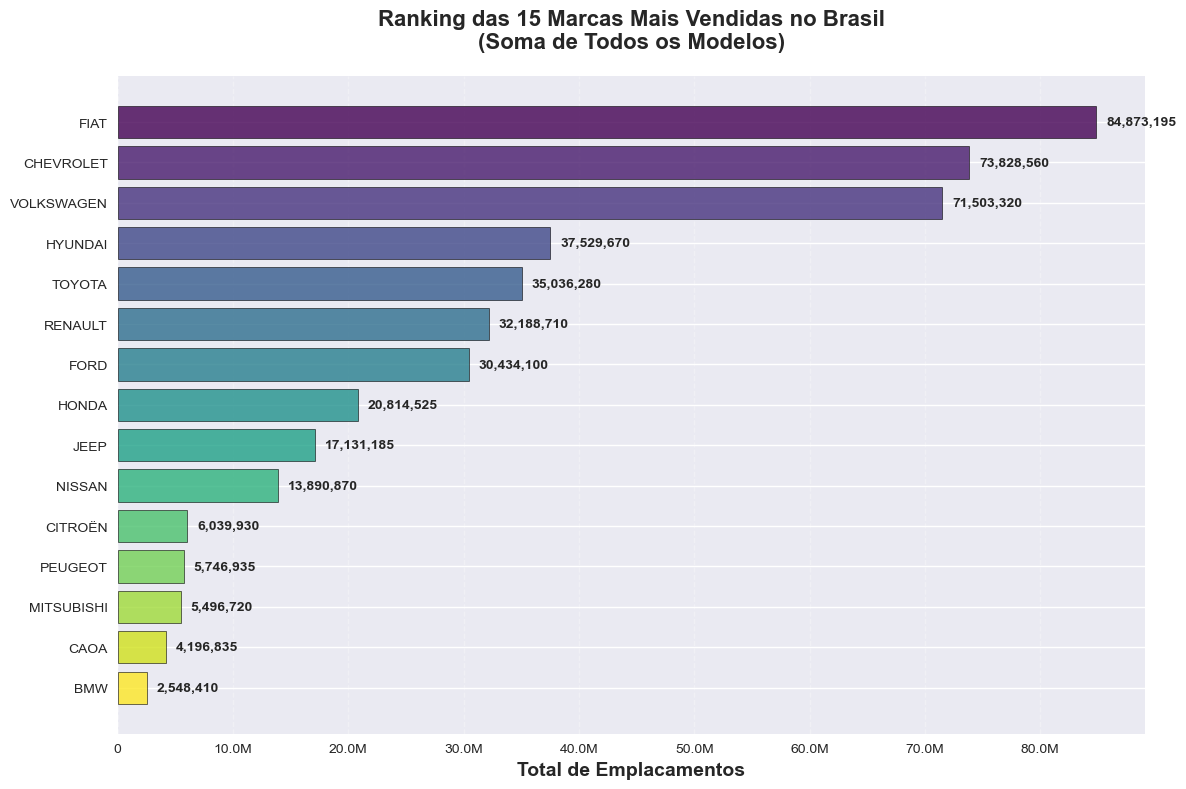

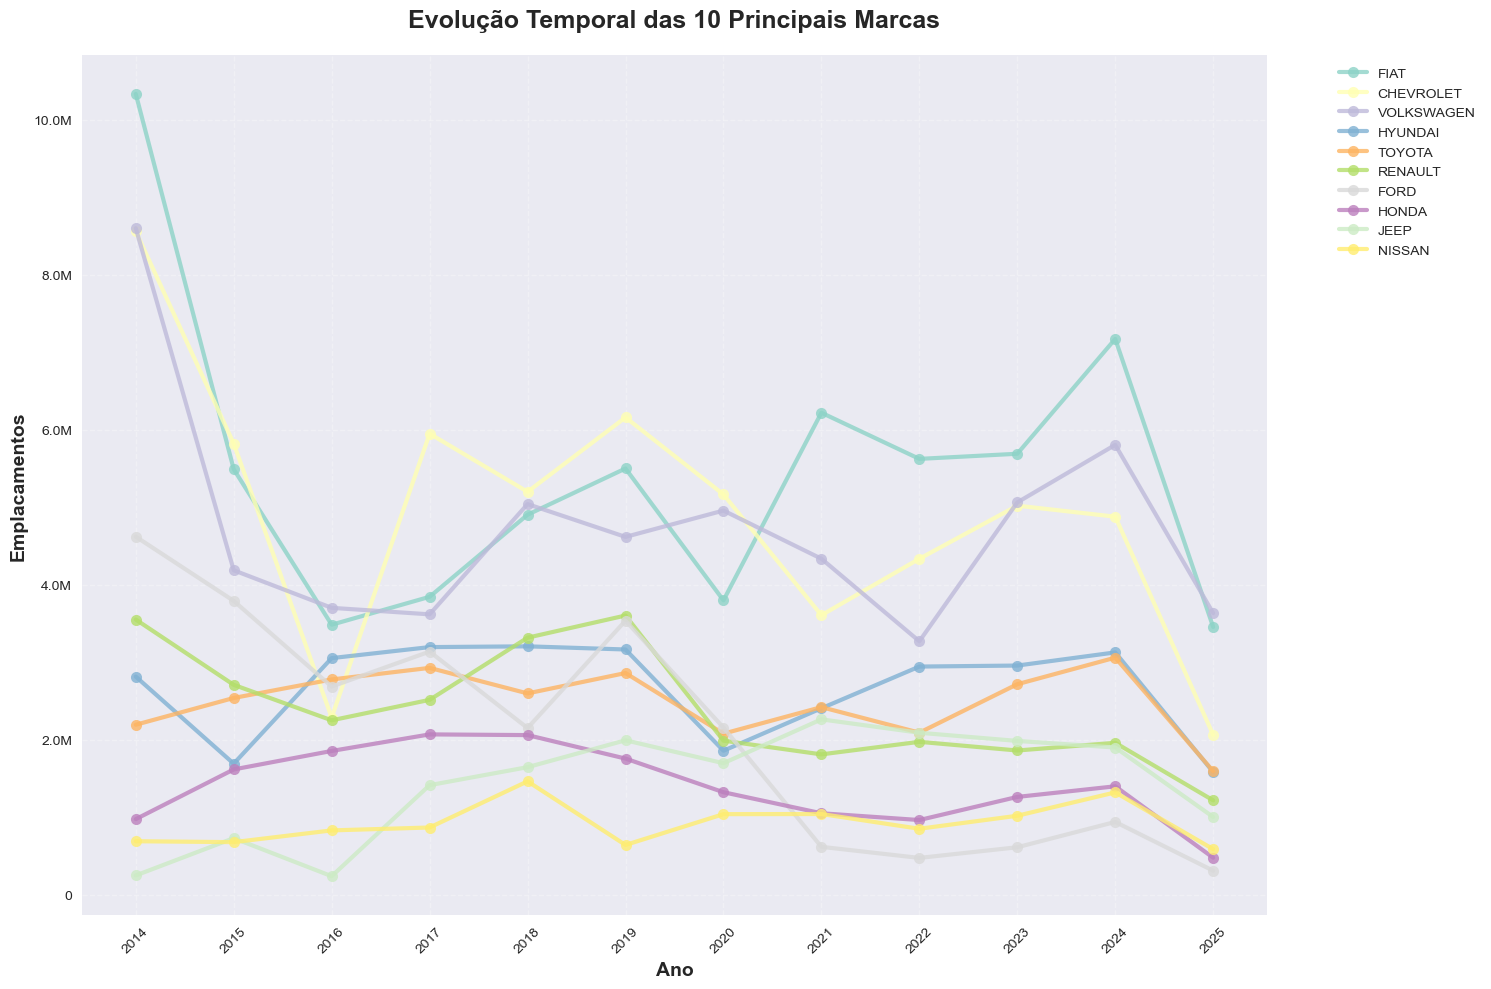

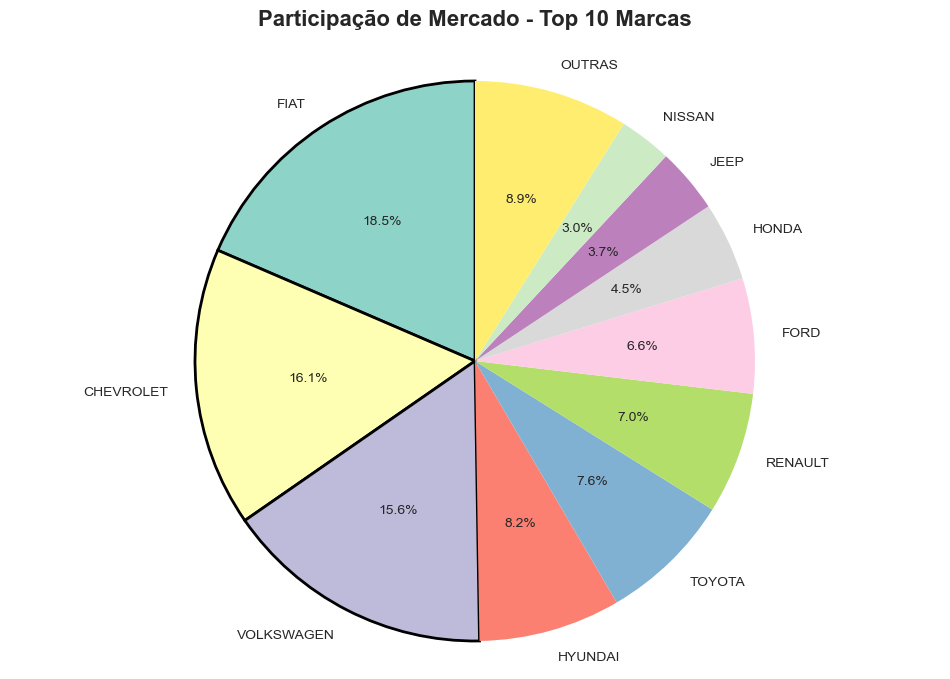


🌐 Gráfico interativo salvo em: ranking_marcas_interativo.html


In [7]:
class AnalisadorMarcas:
    def __init__(self, df):
        self.df = df.copy()
        self.year_columns = []
        self.name_column = None
        self.marcas_df = None
        self._identificar_colunas()
        
    def _identificar_colunas(self):
        """Identifica as colunas de anos e nomes"""
        # Identifica colunas de anos
        for col in self.df.columns:
            try:
                year = int(str(col).strip())
                if 2000 <= year <= 2030:
                    self.year_columns.append(col)
            except:
                continue
        
        # Identifica coluna de veículos
        possible_name_cols = ['Veículo', 'veiculo', 'Modelo', 'modelo', 'Nome', 'nome']
        for col in self.df.columns:
            if any(name_col.lower() in col.lower() for name_col in possible_name_cols):
                self.name_column = col
                break
        
        if not self.name_column and len(self.df.columns) > 0:
            for col in self.df.columns:
                if self.df[col].dtype == 'object':
                    self.name_column = col
                    break
        
        print(f"Colunas de anos: {self.year_columns}")
        print(f"Coluna de veículos: {self.name_column}")
    
    def extrair_marca(self, nome_veiculo):
        """
        Extrai a marca do nome do veículo
        """
        if pd.isna(nome_veiculo):
            return "DESCONHECIDA"
        
        nome = str(nome_veiculo).upper().strip()
        
        # Dicionário com marcas e suas variações
        marcas_map = {
            'VOLKSWAGEN': ['VW', 'VOLKSWAGEN', 'VOLKS'],
            'CHEVROLET': ['CHEVROLET', 'CHEVY', 'GM'],
            'FIAT': ['FIAT'],
            'FORD': ['FORD'],
            'HYUNDAI': ['HYUNDAI'],
            'TOYOTA': ['TOYOTA'],
            'HONDA': ['HONDA'],
            'NISSAN': ['NISSAN'],
            'RENAULT': ['RENAULT'],
            'PEUGEOT': ['PEUGEOT'],
            'CITROËN': ['CITROEN', 'CITROËN'],
            'JEEP': ['JEEP'],
            'BMW': ['BMW'],
            'MERCEDES': ['MERCEDES', 'MERCEDES-BENZ'],
            'AUDI': ['AUDI'],
            'KIA': ['KIA'],
            'MITSUBISHI': ['MITSUBISHI'],
            'SUZUKI': ['SUZUKI'],
            'SUBARU': ['SUBARU'],
            'VOLVO': ['VOLVO'],
            'LAND ROVER': ['LAND ROVER', 'RANGE ROVER'],
            'MINI': ['MINI'],
            'PORSCHE': ['PORSCHE'],
            'JAGUAR': ['JAGUAR'],
            'LEXUS': ['LEXUS'],
            'INFINITI': ['INFINITI'],
            'ACURA': ['ACURA'],
            'ALFA ROMEO': ['ALFA ROMEO', 'ALFA'],
            'MASERATI': ['MASERATI'],
            'FERRARI': ['FERRARI'],
            'LAMBORGHINI': ['LAMBORGHINI'],
            'BENTLEY': ['BENTLEY'],
            'ROLLS ROYCE': ['ROLLS ROYCE', 'ROLLS-ROYCE'],
            'MCLAREN': ['MCLAREN'],
            'ASTON MARTIN': ['ASTON MARTIN'],
            'TESLA': ['TESLA'],
            'BYD': ['BYD'],
            'GREAT WALL': ['GREAT WALL', 'GWM'],
            'JAC': ['JAC'],
            'CHERY': ['CHERY'],
            'CAOA': ['CAOA'],
            'TROLLER': ['TROLLER'],
            'AGRALE': ['AGRALE'],
            'IVECO': ['IVECO'],
            'SCANIA': ['SCANIA'],
            'VOLVO': ['VOLVO'],
            'MAN': ['MAN'],
            'MERCEDES': ['MERCEDES'],
            'INTERNATIONAL': ['INTERNATIONAL'],
            'FOTON': ['FOTON']
        }
        
        # Primeiro tenta encontrar a marca no início do nome
        for marca, variacoes in marcas_map.items():
            for variacao in variacoes:
                if nome.startswith(variacao + ' ') or nome.startswith(variacao + '/') or nome == variacao:
                    return marca
        
        # Se não encontrou, pega a primeira palavra
        primeira_palavra = nome.split()[0] if nome.split() else "DESCONHECIDA"
        
        # Mapeia algumas marcas específicas que podem aparecer diferente
        mapeamento_especial = {
            'VW': 'VOLKSWAGEN',
            'GM': 'CHEVROLET',
            'CITROEN': 'CITROËN',
            'MERCEDES-BENZ': 'MERCEDES',
            'RANGE': 'LAND ROVER',
            'ALFA': 'ALFA ROMEO'
        }
        
        return mapeamento_especial.get(primeira_palavra, primeira_palavra)
    
    def agrupar_por_marca(self):
        """
        Agrupa os dados por marca, somando os valores
        """
        # Adiciona coluna de marca
        self.df['Marca'] = self.df[self.name_column].apply(self.extrair_marca)
        
        # Converte colunas numéricas
        for col in self.year_columns + ['Total']:
            if col in self.df.columns:
                self.df[col] = self.df[col].astype(str).str.replace(',', '').str.replace('.', '')
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce').fillna(0)
        
        # Agrupa por marca
        colunas_para_somar = [col for col in self.year_columns + ['Total'] if col in self.df.columns]
        
        self.marcas_df = self.df.groupby('Marca')[colunas_para_somar].sum().reset_index()
        
        # Ordena por total decrescente
        if 'Total' in self.marcas_df.columns:
            self.marcas_df = self.marcas_df.sort_values('Total', ascending=False)
        else:
            # Se não tem Total, soma todas as colunas de anos
            self.marcas_df['Total_Calculado'] = self.marcas_df[self.year_columns].sum(axis=1)
            self.marcas_df = self.marcas_df.sort_values('Total_Calculado', ascending=False)
        
        print(f"\n🏭 MARCAS IDENTIFICADAS:")
        print("="*50)
        for idx, row in self.marcas_df.head(15).iterrows():
            total = row['Total'] if 'Total' in row else row.get('Total_Calculado', 0)
            print(f"{idx+1:2d}. {row['Marca']:<15} - {total:>8,} emplacamentos")
        
        return self.marcas_df
    
    def criar_grafico_ranking_marcas(self, top_n=15, figsize=(12, 8)):
        """
        Cria gráfico de barras com ranking das marcas
        """
        if self.marcas_df is None:
            self.agrupar_por_marca()
        
        # Pega os top N
        df_plot = self.marcas_df.head(top_n)
        
        plt.figure(figsize=figsize)
        
        # Usa coluna Total ou calcula
        valores = df_plot['Total'] if 'Total' in df_plot.columns else df_plot[self.year_columns].sum(axis=1)
        marcas = df_plot['Marca']
        
        # Cores gradientes
        colors = plt.cm.viridis(np.linspace(0, 1, len(df_plot)))
        
        # Gráfico de barras horizontal
        bars = plt.barh(range(len(marcas)), valores, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
        
        # Adiciona valores nas barras
        for i, (bar, valor) in enumerate(zip(bars, valores)):
            plt.text(valor + max(valores) * 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{valor:,.0f}', va='center', ha='left', fontweight='bold', fontsize=10)
        
        # Formatação
        plt.yticks(range(len(marcas)), marcas)
        plt.xlabel('Total de Emplacamentos', fontsize=14, fontweight='bold')
        plt.title(f'Ranking das {top_n} Marcas Mais Vendidas no Brasil\n(Soma de Todos os Modelos)', 
                 fontsize=16, fontweight='bold', pad=20)
        
        # Inverte eixo Y para mostrar o maior no topo
        plt.gca().invert_yaxis()
        
        # Formatar números no eixo X
        def format_thousands(x, pos):
            if x >= 1000000:
                return f'{x/1000000:.1f}M'
            elif x >= 1000:
                return f'{x/1000:.0f}k'
            else:
                return f'{x:.0f}'
        
        plt.gca().xaxis.set_major_formatter(FuncFormatter(format_thousands))
        
        # Grade
        plt.grid(axis='x', alpha=0.3, linestyle='--')
        
        # Layout
        plt.tight_layout()
        
        return plt
    
    def criar_grafico_temporal_marcas(self, top_n=10, figsize=(15, 10)):
        """
        Cria gráfico de série temporal das marcas
        """
        if self.marcas_df is None:
            self.agrupar_por_marca()
        
        # Pega os top N
        df_plot = self.marcas_df.head(top_n)
        
        plt.figure(figsize=figsize)
        
        # Anos ordenados
        years = sorted([int(col) for col in self.year_columns if str(col).isdigit()])
        colors = plt.cm.Set3(np.linspace(0, 1, len(df_plot)))
        
        # Plota cada marca
        for idx, (_, row) in enumerate(df_plot.iterrows()):
            marca = row['Marca']
            values = [row[str(year)] for year in years]
            
            plt.plot(years, values, marker='o', linewidth=3, markersize=8,
                    label=marca, color=colors[idx], alpha=0.8)
        
        # Formatação
        plt.title(f'Evolução Temporal das {top_n} Principais Marcas', 
                 fontsize=18, fontweight='bold', pad=20)
        plt.xlabel('Ano', fontsize=14, fontweight='bold')
        plt.ylabel('Emplacamentos', fontsize=14, fontweight='bold')
        
        # Formatar eixo Y
        def format_thousands(x, pos):
            if x >= 1000000:
                return f'{x/1000000:.1f}M'
            elif x >= 1000:
                return f'{x/1000:.0f}k'
            else:
                return f'{x:.0f}'
        
        plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))
        plt.xticks(years, rotation=45)
        
        # Grade e legenda
        plt.grid(True, alpha=0.3, linestyle='--')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        
        return plt
    
    def criar_grafico_pizza_marcas(self, top_n=10, figsize=(12, 8)):
        """
        Cria gráfico de pizza das marcas
        """
        if self.marcas_df is None:
            self.agrupar_por_marca()
        
        df_plot = self.marcas_df.head(top_n)
        valores = df_plot['Total'] if 'Total' in df_plot.columns else df_plot[self.year_columns].sum(axis=1)
        
        # Soma os outros
        outros_valor = self.marcas_df.iloc[top_n:]['Total'].sum() if 'Total' in self.marcas_df.columns else 0
        
        if outros_valor > 0:
            labels = list(df_plot['Marca']) + ['OUTRAS']
            sizes = list(valores) + [outros_valor]
        else:
            labels = list(df_plot['Marca'])
            sizes = list(valores)
        
        plt.figure(figsize=figsize)
        
        # Cores
        colors = plt.cm.Set3(np.linspace(0, 1, len(labels)))
        
        # Gráfico de pizza
        wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                          startangle=90, colors=colors,
                                          textprops={'fontsize': 10})
        
        # Destaca as maiores fatias
        for i, wedge in enumerate(wedges[:3]):
            wedge.set_edgecolor('black')
            wedge.set_linewidth(2)
        
        plt.title(f'Participação de Mercado - Top {top_n} Marcas', 
                 fontsize=16, fontweight='bold', pad=20)
        
        plt.axis('equal')
        return plt
    
    def criar_grafico_interativo_marcas(self, top_n=15):
        """
        Cria gráfico interativo das marcas com Plotly
        """
        if self.marcas_df is None:
            self.agrupar_por_marca()
        
        df_plot = self.marcas_df.head(top_n)
        
        # Gráfico de barras interativo
        fig = go.Figure()
        
        valores = df_plot['Total'] if 'Total' in df_plot.columns else df_plot[self.year_columns].sum(axis=1)
        
        fig.add_trace(go.Bar(
            x=valores,
            y=df_plot['Marca'],
            orientation='h',
            marker=dict(
                color=valores,
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title="Emplacamentos")
            ),
            text=[f'{v:,}' for v in valores],
            textposition='auto',
            hovertemplate='<b>%{y}</b><br>' +
                         'Emplacamentos: %{x:,}<br>' +
                         '<extra></extra>'
        ))
        
        fig.update_layout(
            title={
                'text': f'Ranking das {top_n} Marcas Mais Vendidas no Brasil',
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 18}
            },
            xaxis_title='Total de Emplacamentos',
            yaxis_title='Marca',
            template='plotly_white',
            width=1000,
            height=600,
            yaxis={'categoryorder': 'total ascending'}
        )
        
        return fig
    
    def relatorio_completo(self, salvar_csv=True):
        """
        Gera relatório completo das marcas
        """
        if self.marcas_df is None:
            self.agrupar_por_marca()
        
        print("\n" + "="*60)
        print("📊 RELATÓRIO COMPLETO - ANÁLISE POR MARCAS")
        print("="*60)
        
        total_geral = self.marcas_df['Total'].sum() if 'Total' in self.marcas_df.columns else 0
        
        print(f"\n📈 RESUMO GERAL:")
        print(f"Total de marcas identificadas: {len(self.marcas_df)}")
        print(f"Total geral de emplacamentos: {total_geral:,}")
        
        print(f"\n🏆 TOP 10 MARCAS:")
        for i, (_, row) in enumerate(self.marcas_df.head(10).iterrows(), 1):
            total = row['Total'] if 'Total' in row else 0
            participacao = (total / total_geral * 100) if total_geral > 0 else 0
            print(f"{i:2d}. {row['Marca']:<15} - {total:>10,} ({participacao:5.1f}%)")
        
        # Análise de concentração
        top_5_total = self.marcas_df.head(5)['Total'].sum() if 'Total' in self.marcas_df.columns else 0
        concentracao = (top_5_total / total_geral * 100) if total_geral > 0 else 0
        
        print(f"\n🎯 ANÁLISE DE CONCENTRAÇÃO:")
        print(f"Top 5 marcas representam: {concentracao:.1f}% do mercado")
        
        if salvar_csv:
            filename = 'ranking_marcas_emplacamentos.csv'
            self.marcas_df.to_csv(filename, index=False, encoding='utf-8-sig')
            print(f"\n💾 Dados salvos em: {filename}")
        
        return self.marcas_df

# Função principal para usar
def analisar_marcas(df, criar_graficos=True, salvar_html=True):
    """
    Função principal para análise completa por marcas
    """
    print("🏭 INICIANDO ANÁLISE POR MARCAS...")
    
    # Cria o analisador
    analisador = AnalisadorMarcas(df)
    
    # Gera relatório
    marcas_df = analisador.relatorio_completo()
    
    if criar_graficos:
        print("\n📊 Criando gráficos...")
        
        # Gráfico de ranking
        plt_ranking = analisador.criar_grafico_ranking_marcas(top_n=15)
        plt_ranking.show()
        
        # Gráfico temporal
        plt_temporal = analisador.criar_grafico_temporal_marcas(top_n=10)
        plt_temporal.show()
        
        # Gráfico de pizza
        plt_pizza = analisador.criar_grafico_pizza_marcas(top_n=10)
        plt_pizza.show()
        
        if salvar_html:
            # Gráfico interativo
            fig_interativo = analisador.criar_grafico_interativo_marcas(top_n=15)
            filename = 'ranking_marcas_interativo.html'
            fig_interativo.write_html(filename)
            print(f"\n🌐 Gráfico interativo salvo em: {filename}")
    
    return marcas_df, analisador

# EXEMPLO DE USO:
# df = pd.read_csv('emplacamentos_veiculos.csv')
marcas_df, analisador = analisar_marcas(df)